<a href="https://colab.research.google.com/github/mallikaa03/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
import re
import nltk
import numpy as np
nltk.download('punkt')
import pandas as pd




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import string
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

# load the text file
with open("Sherlock Holmes.txt", "r") as file:
    text = file.read()

# tokenize the text and remove punctuation marks
tokens = word_tokenize(text)

# remove punctuation marks
tokens = [word for word in tokens if word not in string.punctuation]
#remove stopwords
tokens = [token for token in tokens if not token in stopwords.words("english")]



print(len(tokens))

print(tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


62676
['Project', 'Gutenberg', "'s", 'The', 'Adventures', 'Sherlock', 'Holmes', 'Arthur', 'Conan', 'Doyle', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.net', 'Title', 'The', 'Adventures', 'Sherlock', 'Holmes', 'Author', 'Arthur', 'Conan', 'Doyle', 'Release', 'Date', 'November', '29', '2002', 'EBook', '1661', 'Last', 'Updated', 'May', '20', '2019', 'Language', 'English', 'Character', 'set', 'encoding', 'UTF-8', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'THE', 'ADVENTURES', 'OF', 'SHERLOCK', 'HOLMES', 'Produced', 'anonymous', 'Project', 'Gutenberg', 'volunteer', 'Jose', 'Menendez', 'cover', 'The', 'Adventures', 'Sherlock', 'Holmes', 'Arthur', 'Conan', 'Doyle', 'Contents', 'I', 'A', 'Scandal', 'Bohemia', 'II', 'The', 'Red-Headed', 'League', 'III', 'A', 'Case', 'Identity', 'IV', 'The', 'Bosc

In [ ]:
# find the bigram collocations
finder = BigramCollocationFinder.from_words(tokens)
finder.apply_word_filter(lambda word: word in nltk.corpus.stopwords.words("english") or word in string.punctuation or word == '" "' or word=="I" )
finder.apply_freq_filter(10)
collocations = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)

# print the collocations
print(collocations)
print(len(collocations))

[('Time', 'Traveller'), ('Project', 'Gutenberg-tm'), ('”', 'said'), ('Time', 'Machine'), ('Medical', 'Man'), ('Project', 'Gutenberg'), ('Literary', 'Archive'), ('United', 'States'), ('White', 'Sphinx'), ('”', '“')]
10


In [ ]:
ds= pd.DataFrame(collocations)
ds.head(10)

,0,1
0,Time,Traveller
1,Project,Gutenberg-tm
2,”,said
3,Time,Machine
4,Medical,Man
5,Project,Gutenberg
6,Literary,Archive
7,United,States
8,White,Sphinx
9,”,“


In [ ]:
# Read in the text file
with open('Sherlock Holmes.txt', 'r') as file:
    text = file.read()

# Pre-processing
text = text.lower()
text = re.sub(r'[^a-zA-Z0-9\s]', '', text)


# Generate the word co-occurrence matrix
co_matrix = nltk.FreqDist(ngrams(tokens, 2))

print(co_matrix.most_common())



[(('of', 'the'), 743), (('in', 'the'), 521), (('it', 'is'), 336), (('to', 'the'), 319), (('i', 'have'), 299), (('it', 'was'), 276), (('that', 'i'), 256), (('at', 'the'), 240), (('and', 'i'), 213), (('and', 'the'), 203), (('to', 'be'), 200), (('upon', 'the'), 196), (('i', 'was'), 185), (('with', 'a'), 184), (('i', 'am'), 181), (('of', 'a'), 174), (('i', 'had'), 168), (('was', 'a'), 159), (('with', 'the'), 156), (('that', 'he'), 154), (('that', 'the'), 154), (('he', 'was'), 151), (('on', 'the'), 146), (('is', 'a'), 146), (('in', 'a'), 142), (('said', 'he'), 141), (('from', 'the'), 138), (('you', 'have'), 137), (('to', 'me'), 133), (('of', 'his'), 131), (('by', 'the'), 131), (('he', 'had'), 130), (('have', 'been'), 130), (('into', 'the'), 126), (('and', 'a'), 122), (('in', 'his'), 120), (('as', 'i'), 119), (('that', 'it'), 119), (('had', 'been'), 117), (('for', 'the'), 116), (('that', 'you'), 113), (('said', 'holmes'), 111), (('there', 'was'), 106), (('which', 'i'), 103), (('there', 'is')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the frequency distribution to a dataframe
co_matrix_df = pd.DataFrame(list(co_matrix.items()), columns=['bigram', 'frequency'])

co_matrix_df.head(50)


,bigram,frequency
0,"(Project, Gutenberg)",30
1,"(Gutenberg, 's)",1
2,"('s, The)",1
3,"(The, Adventures)",4
4,"(Adventures, Sherlock)",4
5,"(Sherlock, Holmes)",96
6,"(Holmes, Arthur)",3
7,"(Arthur, Conan)",4
8,"(Conan, Doyle)",4
9,"(Doyle, This)",1


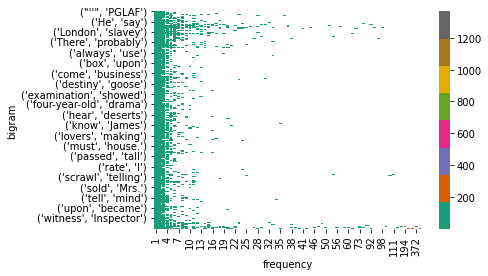

In [ ]:
# Create a pivot table with bigrams as rows and columns
pivot = co_matrix_df.pivot(index=co_matrix_df.columns[0], columns=co_matrix_df.columns[1], values='frequency')


# Plot the pivot table as a heatmap
sns.heatmap(pivot, annot=False, cmap='Dark2')

# Show the plot
plt.show()

In [ ]:
import string
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

# load the text file
with open("The Time Machine.txt", "r") as file:
    text = file.read()

# tokenize the text and remove punctuation marks
tokens = word_tokenize(text)

# remove punctuation marks
tokens = [word for word in tokens if word not in string.punctuation]
tokens = [token for token in tokens if not token in stopwords.words("english")]

print(tokens)
print(len(tokens))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['The', 'Project', 'Gutenberg', 'EBook', 'The', 'Time', 'Machine', 'H.', 'G.', 'Wells', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.net', 'Title', 'The', 'Time', 'Machine', 'Author', 'H.', 'G.', 'Wells', 'Release', 'Date', 'October', '2', '2004', 'EBook', '35', 'Last', 'Updated', 'January', '14', '2018', 'Language', 'English', 'Character', 'set', 'encoding', 'UTF-8', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'THE', 'TIME', 'MACHINE', 'The', 'Time', 'Machine', 'An', 'Invention', 'H.', 'G.', 'Wells', 'CONTENTS', 'I', 'Introduction', 'II', 'The', 'Machine', 'III', 'The', 'Time', 'Traveller', 'Returns', 'IV', 'Time', 'Travelling', 'V', 'In', 'Golden', 'Age', 'VI', 'The', 'Sunset', 'Mankind', 'VII', 'A', 'Sudden', 'Shock', 'VIII', 'Explanation', 'IX', 'The', 'Morlocks', 'X', 'When', 'Night', 

In [ ]:
# find the bigram collocations
finder = BigramCollocationFinder.from_words(tokens)
finder.apply_word_filter(lambda word: word in nltk.corpus.stopwords.words("english") or word in string.punctuation or word =='"' or word=="I")
finder.apply_freq_filter(3)
collocations = finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)

# print the collocations
print(collocations)


[('Time', 'Traveller'), ('Project', 'Gutenberg-tm'), ('”', 'said'), ('Time', 'Machine'), ('Medical', 'Man'), ('Project', 'Gutenberg'), ('Literary', 'Archive'), ('United', 'States'), ('White', 'Sphinx'), ('”', '“'), ('Gutenberg-tm', 'electronic'), ('Archive', 'Foundation'), ('electronic', 'works'), ('Gutenberg', 'Literary'), ('Green', 'Porcelain'), ('Palace', 'Green'), ('The', 'Time'), ('set', 'forth'), ('little', 'people'), ('could', 'see')]


In [ ]:
# Read in the text file
with open('The Time Machine.txt', 'r') as file:
    text = file.read()

# Pre-processing
text = text.lower()
text = re.sub(r'[^a-zA-Z0-9\s]', '', text)


# Generate the word co-occurrence matrix
co_matrix2 = nltk.FreqDist(ngrams(tokens, 2))

print(co_matrix2.most_common())

[(('of', 'the'), 743), (('in', 'the'), 521), (('it', 'is'), 336), (('to', 'the'), 319), (('i', 'have'), 299), (('it', 'was'), 276), (('that', 'i'), 256), (('at', 'the'), 240), (('and', 'i'), 213), (('and', 'the'), 203), (('to', 'be'), 200), (('upon', 'the'), 196), (('i', 'was'), 185), (('with', 'a'), 184), (('i', 'am'), 181), (('of', 'a'), 174), (('i', 'had'), 168), (('was', 'a'), 159), (('with', 'the'), 156), (('that', 'he'), 154), (('that', 'the'), 154), (('he', 'was'), 151), (('on', 'the'), 146), (('is', 'a'), 146), (('in', 'a'), 142), (('said', 'he'), 141), (('from', 'the'), 138), (('you', 'have'), 137), (('to', 'me'), 133), (('of', 'his'), 131), (('by', 'the'), 131), (('he', 'had'), 130), (('have', 'been'), 130), (('into', 'the'), 126), (('and', 'a'), 122), (('in', 'his'), 120), (('as', 'i'), 119), (('that', 'it'), 119), (('had', 'been'), 117), (('for', 'the'), 116), (('that', 'you'), 113), (('said', 'holmes'), 111), (('there', 'was'), 106), (('which', 'i'), 103), (('there', 'is')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the frequency distribution to a dataframe
co_matrix_df2 = pd.DataFrame(list(co_matrix2.items()), columns=['bigram', 'frequency'])

co_matrix_df2.head(50)

,bigram,frequency
0,"(the, project)",32
1,"(project, gutenberg)",31
2,"(gutenberg, ebook)",4
3,"(ebook, of)",2
4,"(of, the)",340
5,"(the, time)",107
6,"(time, machine)",44
7,"(machine, by)",2
8,"(by, h)",3
9,"(h, g)",4


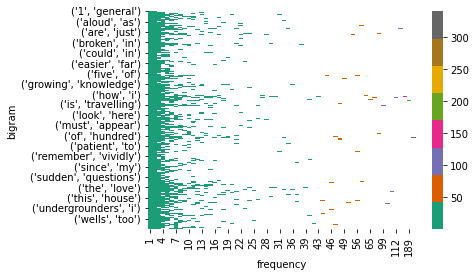

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the frequency distribution to a dataframe
co_matrix_df1 = pd.DataFrame(list(co_matrix2.items()), columns=['bigram', 'frequency'])

# Create a pivot table with bigrams as rows and columns
pivot = co_matrix_df1.pivot(index=co_matrix_df1.columns[0], columns=co_matrix_df1.columns[1], values='frequency')


# Plot the pivot table as a heatmap
sns.heatmap(pivot, annot=False, cmap='Dark2')

# Show the plot
plt.show()
